<center>
    <img src="https://cds.cern.ch/record/1306150/files/cmsLogo_image.jpg" width="300" alt="cognitiveclass.ai logo"  />
    
</center>

# Pile Up Study at the CMS experiment in 2018

### importing libraries and classes


In [1]:
from __future__ import annotations
import uproot
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
import plotly
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt


from plotly.subplots import make_subplots
from typing import overload
from abc import ABC, abstractmethod
import sympy
from sympy.integrals.transforms import laplace_transform
import random
import math
from tqdm.auto import tqdm, trange
from concurrent.futures import ThreadPoolExecutor
import scipy.stats as stats
from scipy.optimize import curve_fit


from Class1 import parametricValue

    
from Class1 import fixedValue


from Class1 import parametricValueNumpy


from Class1 import parametricValueSympy


#these are important for me

from Class1 import binning


from Class1 import discretepdf


from Class1 import NLL


from Class1 import lumiDist


from Class1 import lumiDistSympyLaplace


from Class1 import lumiDistNumpy


from Class1 import SimulationVSPu


In [2]:
from Class1 import RunInfo


## choosing Runs and Eras

In [3]:
from allInfo import GetAllRuns, GetAllEras

year =2018
GetAllEras(year)

['B', 'A']

In [4]:
# year = 2018
# eras = GetAllEras(year)
# era = '1'
# allRuns = sorted( list(set( GetAllRuns(year , era) ) ) )

In [5]:
year =2018
eras = ['A' , 'B']
# for era in GetAllEras(year):
for era in eras:
    allRuns = sorted( list(set( GetAllRuns(year , era) ) ) )
    print(era, ':' , allRuns)

A : [315257, 315259, 315264, 315265, 315267, 315270, 315322, 315339, 315357, 315361, 315363, 315366, 315420, 315488, 315489, 315490, 315506, 315510, 315512, 315543, 315555, 315556, 315557, 315640, 315641, 315642, 315644, 315645, 315646, 315647, 315648, 315689, 315690, 315702, 315703, 315704, 315705, 315713, 315721, 315741, 315764, 315770, 315784, 315785, 315786, 315790, 315800, 315801, 315840, 315973, 315974, 316058, 316059, 316060, 316061, 316062, 316082, 316110, 316111, 316113, 316114, 316153, 316186, 316187, 316199, 316200, 316201, 316202, 316216, 316217, 316218, 316219, 316239, 316240, 316241, 316271, 316361, 316362, 316363, 316377, 316378, 316379, 316380, 316455, 316457, 316469, 316470, 316472, 316505, 316569, 316590, 316613, 316615, 316666, 316667, 316700, 316701, 316702, 316715, 316716, 316717, 316718, 316719, 316720, 316721, 316722, 316723, 316758, 316766, 316876, 316877, 316879, 316928, 316985, 316993, 316994, 316995]
B : [317080, 317087, 317089, 317182, 317212, 317213, 317279

In [6]:
A_allRuns = sorted( list(set( GetAllRuns(2018 , 'A') ) ) )
B_allRuns = sorted( list(set( GetAllRuns(2018 , 'B') ) ) )
print('era A has {0} runs'.format(len(A_allRuns)))
print('era B has {0} runs'.format(len(B_allRuns)))

era A has 117 runs
era B has 43 runs


In [7]:
Runs = allRuns[: :5]
Runs

[317080, 317213, 317319, 317382, 317438, 317527, 317648, 317683, 318876]

In [8]:
year , era = 2018 , 'A'
allRuns = sorted( list(set( GetAllRuns(year , era) ) ) )
allRuns = allRuns[22:24]
allRuns

[315557, 315640]

In [9]:
allRuns = sorted( list(set( GetAllRuns(year , era) ) ) )
Runs = allRuns[23:28]
if len(Runs) == 1:
    ind = allRuns.index(Runs[0])
    runName = 'RunNo:{0}'.format(ind+1)
else:
    runName = 'nRuns={0}'.format(len(Runs))
runName

'nRuns=5'

## Run Cell

In [10]:
web1 = '/eos/user/c/cmstandi/SWAN_projects/Nima/PUFit' # source directory
web2 = '/eos/user/c/cmstandi/www/PU/newres/New' # publish directory

#Experiment Number:
expN = 102 # change this every time you want to run new feature. 

from pathlib import Path

import sys
sys.path.append('../nTuplizer')

from allInfo import GetAllRuns, GetAllEras

def export_graph(g , n , pname, pdir):
    ghtml = g.to_html()
    Path('{0}/{1}/'.format(pdir , pname) ).mkdir(parents=True, exist_ok=True)
    with open('{0}/{1}/{2}.html'.format(pdir , pname , n) , 'w') as f:
        f.write(ghtml)
def publish_res(rinfo , gchi2 , vname ,  name , publish_dir):

    
    
    
    gg = rinfo.plot_lumi_distribution(subRuns=-1 , colorLumiScale=4 , density=False)
    
    # updated plot layout in Class1
#     gg.update_layout(
#         title="Distribution of BX luminosity",
#         xaxis_title='luminosity (1/mb 1/25ns)',
#         yaxis_title="probability",
#         legend_title="Runs",
#     )
    export_graph(gg , '01-lumi_distribution' , name , publish_dir)
    
    
    
    
    #02-pu_distribution
    
    gg = rinfo.plotPUDists(70)
    export_graph(gg , '02-pu_distribution' , name , publish_dir)
    
    
    
    
    
    #03-{vname}_distribution:
    
    if rinfo.parentRun is None:
        gg = rinfo.plotDataDist(zoom=True)
        export_graph(gg , '03-{0}_distribution'.format(vname) , name , publish_dir) 

    
    
    
    #04-{vname}_predictions:

    gg = rinfo.plotPredictions([60,65,75,80,90])
    export_graph(gg , '04-{0}_predictions'.format(vname) , name , publish_dir)
    
        
        
        
        
    for _xsec in [60,65,75,80,90]:
        gg = rinfo.plotRunPredictions(_xsec)
        export_graph(gg , '05-{0}_predictions_xsec{1}'.format(vname , _xsec) , name , publish_dir)
            
    
    
    export_graph(gchi2 , '06-bestfit_details'  , name , publish_dir)
    export_graph(rinfo.postFitPlots(), '07-postFit_plots'  , name , publish_dir)
    export_graph(rinfo.pullPlots(50 , 1.3) , '08-pullPlots' , name , publish_dir)
    export_graph(rinfo.NadjiehPullPlots(50 , 1.3) , '08-NadjiehPullPlots' , name , publish_dir)
    
    
    
    
    
    if rinfo.parentRun is None:
        export_graph(rinfo.aggregateFitRes() , '09-summary1' , name ,publish_dir)
        export_graph(rinfo.aggregateFitRes2() , '09-summary2' , name ,publish_dir)
        export_graph(rinfo.aggregateFitRes3() , '09-summary3' , name ,publish_dir)
        export_graph(rinfo.aggregateFitRes4() , '09-summary4' , name ,publish_dir)
        
        
   
rinfo = None
        
def process_and_publish(year , era , vname , vmin , vmax , vnbins , pu_max ,
                        lumiName = 'PHYSICSDel' , 
                        ### look for Choosing Lumi-quantile cell below
#                         lumiQ =  np.array([0,0.2,0.6,1.0]) ,
#                         lumiQ =  np.array([0,0.01 , 0.1, 0.5, 0.9,1.0]) ,
                        lumiQ =  np.array([0,0.055,0.115,0.255,0.365, 0.455,0.515,0.665,0.785,0.935,1.0]) ,
                        lnbins_per_q = 20,
                        xsec = np.arange(30,100,1), nthreads = 30 , publish_dir = web2 ):
    nbins = lumiQ.size -1
  #  print(nbins)  
    
    #Runs
    allRuns = sorted( list(set( GetAllRuns(year , era) ) ) )
    Runs = allRuns[::5]
#     Runs = allRuns[0:1]
    if len(Runs) == 1:
        ind = allRuns.index(Runs[0])
        runName = 'RunNo:{0}'.format(ind+1)
    else:
        runName = 'nRuns={0}'.format(len(Runs))
    runName
    
    
    
    head = 'expe={0}_{1}{2}_nLumiBins={3}_{4}'.format(expN,era, year,nbins , runName)
    name = '{0}/{1}'.format(head, vname)
    
    
    #00simulation plot:
    
    var_bins = np.linspace(vmin,vmax,vnbins+1)
    simDist = SimulationVSPu(vname , year = year , var_bins=var_bins , pu_max=pu_max , nthreads=nthreads)


    g = simDist.plot(param=1 , label = 'PU = 1')
    for i in range(10,90+1,10):
        theName = 'PU = {0}'.format(i)
        simDist.plot(param=i , g=g , 
                     scatterOpts={ 'name':theName}
                    )

    g.update_layout(
        title="Simulated distribution for PU ",
        xaxis_title= vname,
        yaxis_title="probability",
        legend_title="PU number",
    )    
    export_graph(g , '00-Simulation' , name , publish_dir )
    
    
    
    

    
    
    
    print('is going to run over {0} runs'.format( len(Runs)) )
    print('Number of Lumi Bins = {0}'.format(nbins))

    
    rinfo = RunInfo(0 , vname , var_bins , lumiName ,lumiQ , nbins_perq=lnbins_per_q , sub_runs=Runs , 
                    nthreads=nthreads , xsecs = xsec)
    
    rinfo.setSimulation(simDist)
    gchi2 = rinfo.fit()
    
#     print(vname)
#     print(var_bins)
#     print(lumiName)
#     print(lumiQ)
#     print(lnbins_per_q)
    
    try:
        
        publish_res(rinfo , gchi2 , vname , name , publish_dir)
        for sr in rinfo._subRuns : #+ rinfo._subRunsSameLumiBins:
            #ext = '/SRSimilarBinning' if sr._isSecondHand else '/SRSameBinning'
            publish_res(sr , None , vname , vname , '{0}/{1}/Runs/Run{2}'.format(publish_dir , head , sr.run) )
    except Exception as e:
        print(e)
        return head, rinfo

    #del rinfo
    #del simDist
    

    return head, rinfo
 

    

In [11]:
variables = { 
              "nVertices" : ( "nVertices" , 90 , 0 , 90 ) ,
              "nGoodVertices" : ("nGoodVertices", 80, 0 , 80) ,
#               "nEles" : ("nEles" , 10 , 0 , 10 ) ,
#               "nMus" : ("nMus" , 10 , 0 , 10 ),
              "nChargedHadrons" : ("nChargedHadrons" , 120 , 0 , 1200 ),
              "nLostTracks": ("nLostTracks" , 35 , 0 , 35 ),
              "nPhotons" : ("nPhotons" , 120 , 0 , 600 ),
#               "nNeutralHadrons" : ("nNeutralHadrons" , 60 , 0 , 120 ),
              "fixedGridRhoAll" : ("fixedGridRhoAll" , 40 , 0 , 40 ),
              "fixedGridRhoFastjetAll" : ("fixedGridRhoFastjetAll" , 40 , 0 , 40 ),
              "fixedGridRhoFastjetAllCalo" : ("fixedGridRhoFastjetAllCalo" , 25 , 0 , 25 ),
              "fixedGridRhoFastjetCentral" : ("fixedGridRhoFastjetCentral" , 50 , 0 , 50 ),
              "fixedGridRhoFastjetCentralCalo" : ("fixedGridRhoFastjetCentralCalo" , 20 , 0 , 20 ),
              "fixedGridRhoFastjetCentralChargedPileUp" : ("fixedGridRhoFastjetCentralChargedPileUp" , 35 , 0 , 35 ),
              "fixedGridRhoFastjetCentralNeutral" : ("fixedGridRhoFastjetCentralNeutral" , 12 , 0 , 12 )
            }

vvv = {}
year , era = 2018 , 'B'
for v,vinfo in variables.items():
     head , vvv[v]  = process_and_publish(year , era , vinfo[0] , vinfo[2] , vinfo[3] , vinfo[1] , 90  )
        

  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 9 runs
Number of Lumi Bins = 10


  0%|          | 0/41 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/28 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 9 runs
Number of Lumi Bins = 10


  0%|          | 0/41 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/28 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 9 runs
Number of Lumi Bins = 10


  0%|          | 0/41 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/28 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 9 runs
Number of Lumi Bins = 10


  0%|          | 0/41 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/28 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 9 runs
Number of Lumi Bins = 10


  0%|          | 0/41 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/28 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 9 runs
Number of Lumi Bins = 10


  0%|          | 0/41 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/28 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 9 runs
Number of Lumi Bins = 10


  0%|          | 0/41 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/28 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 9 runs
Number of Lumi Bins = 10


  0%|          | 0/41 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/28 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 9 runs
Number of Lumi Bins = 10


  0%|          | 0/41 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/28 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/10 [00:01<?, ?it/s, RUN 317213]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 9 runs
Number of Lumi Bins = 10


  0%|          | 0/41 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/28 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 9 runs
Number of Lumi Bins = 10


  0%|          | 0/41 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/28 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


  0%|          | 0/92 [00:00<?, ?it/s, SIMULATION]

is going to run over 9 runs
Number of Lumi Bins = 10


  0%|          | 0/41 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/23 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/28 [00:00<?, ?it/s, RUN 0]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317382]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317319]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317683]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317648]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317080]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 318876]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317527]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317438]

  0%|          | 0/10 [00:00<?, ?it/s, RUN 317213]

  0%|          | 0/19 [00:00<?, ?it/s, RUN 0]

In order to reference traces by row and column, you must first use plotly.tools.make_subplots to create the figure with a subplot grid.


## name of this Experiment: uses in naming folders

In [12]:
head

'expe=102_B2018_nLumiBins=10_nRuns=9'

## making directories for overviewPlots both in source and publish directories

In [13]:
# overview for publishL
import os

directory = "{0}/overview".format(head)
  
# Parent Directory path
parent_dir = web2
  
# Path
path = os.path.join(parent_dir, directory)
  

try:
    os.makedirs(path)
except OSError as error:
    print(error)

In [14]:
#overviewPlots for source
import os

directory1 = 'overviewPlots/{0}'.format(head)
  
# Parent Directory path
parent_dir1 = web1
  
# Path
path = os.path.join(parent_dir1, directory1)
  

try:
    os.makedirs(path)
except OSError as error:
    print(error)

## Luminosity and PileUp dists:

In [15]:
def export_Graph(g , n , pdir):
    ghtml = g.to_html()
    Path('{0}/'.format(pdir ) )
    with open('{0}/{1}.html'.format(pdir , n) , 'w') as f:
        f.write(ghtml)

In [16]:
G = vvv['nVertices'].lumi_distribution.plot()
export_Graph(G , 'LumiDist', '{0}/{1}/'.format(parent_dir,directory))
G


### Choosing Lumi-quantile

In [17]:
L = vvv['nVertices'].lumi_distribution.bins_array
# L

In [18]:
### based on lumi_distribution.plot()
l = vvv['nVertices'].lumi_distribution.bins_array
# l = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
lumi_q = np.array([0,0.055,0.115,0.365,0.785,0.935,1.0])
lumi_Limit = np.quantile(l , lumi_q)
lumi_Limit

array([-0.00419617,  0.13250315,  0.2550914 ,  0.4433276 ,  0.57756565,
        0.73790778,  0.90188617])

In [19]:
s = vvv['nVertices']._subRuns
s[0].plot_lumi_distribution()

In [20]:
s = vvv['nVertices']._subRuns[0].all_lumi_bins
s

[0.0010632398986816405,
 0.0054670054382343295,
 0.009870770977787019,
 0.014274536517339708,
 0.018678302056892398,
 0.02308206759644509,
 0.027485833135997777,
 0.03188959867555047,
 0.03629336421510316,
 0.04069712975465585,
 0.04510089529420854,
 0.049504660833761226,
 0.05390842637331392,
 0.05831219191286661,
 0.06271595745241929,
 0.06711972299197198,
 0.07152348853152467,
 0.07592725407107735,
 0.08033101961063005,
 0.08473478515018273,
 0.08913855068973542,
 0.09193386900378991,
 0.0947291873178444,
 0.09752450563189889,
 0.10031982394595337,
 0.10311514226000787,
 0.10591046057406237,
 0.10870577888811685,
 0.11150109720217134,
 0.11429641551622582,
 0.11709173383028032,
 0.11988705214433482,
 0.1226823704583893,
 0.12547768877244378,
 0.12827300708649828,
 0.13106832540055277,
 0.13386364371460727,
 0.13665896202866173,
 0.13945428034271623,
 0.14224959865677073,
 0.14504491697082522,
 0.15207670304691318,
 0.15910848912300113,
 0.16614027519908908,
 0.17317206127517704,
 0.

In [21]:
s = vvv['nVertices']._subRuns[0].vals
s

{'PHYSICSDel': array([0.60874312, 0.68695336, 0.6388339 , ..., 0.56554945, 0.70684848,
        0.64063203]),
 'nVertices': array([36, 41, 36, ..., 36, 44, 55], dtype=int32)}

In [22]:
s = vvv['nVertices']._subRuns[0].vals['PHYSICSDel']
s
# len(s)

array([0.60874312, 0.68695336, 0.6388339 , ..., 0.56554945, 0.70684848,
       0.64063203])

In [23]:
G = vvv['nVertices'].plot_lumi_distribution()
export_Graph(G , 'LumiDistMain', '{0}/{1}/'.format(parent_dir,directory))
G


In [24]:
xsec = 70
G = vvv['nVertices'].plotPUDists(xsec)
# vvv['nVertices'].plotDataDist()

export_Graph(G , 'PUDist({0})'.format(xsec) , '{0}/{1}/'.format(parent_dir,directory))
# export_Graph(G , 'PUDist({0})'.format(xsec) , '{0}/{1}/'.format(parent_dir1,directory1))

G

## Creating overview plot for all lumi bins:

### fit Result

In [25]:
for variable in vvv:
    for i in range(len(vvv[variable].fitResults)):
        print(vvv[variable].fitResults[i])

data: nVertices_run0_lumi1 best fit: 73.0 +- 1.0
data: nVertices_run0_lumi2 best fit: 72.0 +- 1.0
data: nVertices_run0_lumi3 best fit: 73.0 +- 1.0
data: nVertices_run0_lumi4 best fit: 73.0 +- 1.0
data: nVertices_run0_lumi5 best fit: 73.0 +- 1.0
data: nVertices_run0_lumi6 best fit: 74.0 +- 1.0
data: nVertices_run0_lumi7 best fit: 74.0 +- 1.0
data: nVertices_run0_lumi8 best fit: 75.0 +- 1.0
data: nVertices_run0_lumi9 best fit: 76.0 +- 1.0
data: nVertices_run0_lumi10 best fit: 78.0 +- 1.0
data: nGoodVertices_run0_lumi1 best fit: 64.0 +- 1.0
data: nGoodVertices_run0_lumi2 best fit: 64.0 +- 1.0
data: nGoodVertices_run0_lumi3 best fit: 64.0 +- 1.0
data: nGoodVertices_run0_lumi4 best fit: 65.0 +- 1.0
data: nGoodVertices_run0_lumi5 best fit: 65.0 +- 1.0
data: nGoodVertices_run0_lumi6 best fit: 65.0 +- 1.0
data: nGoodVertices_run0_lumi7 best fit: 66.0 +- 1.0
data: nGoodVertices_run0_lumi8 best fit: 66.0 +- 1.0
data: nGoodVertices_run0_lumi9 best fit: 67.0 +- 1.0
data: nGoodVertices_run0_lumi10 

12
10


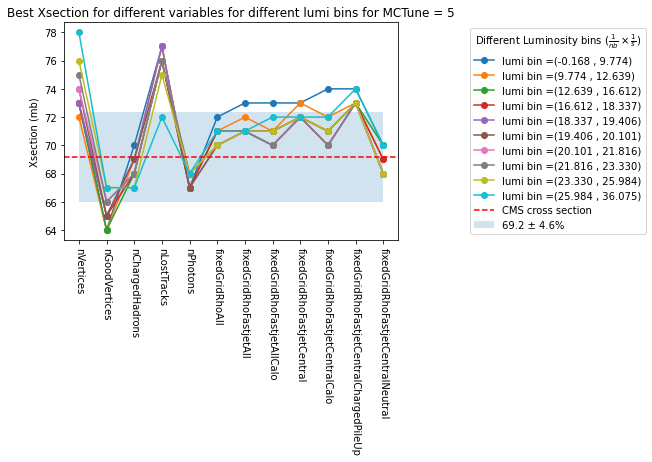

In [26]:
#total plots export

import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


XsecBestTot = {}
keys = []
values = []
nVar = len(variables.keys())
print(nVar)
for key in vvv:
    for i in range(vvv[key].nLumiBins):
#         print(i)
        if i == 20 - 1:
            print(i)
print(vvv[key].nLumiBins)
for i in range(vvv[key].nLumiBins):
    lh = vvv[key].lumi_hists[i]
    for key in vvv:
#         keys.append('{0} for lumi bin = {1} '.format(vvv[key].vname , i+1))
        keys.append(vvv[key].vname)
        values.append(vvv[key].fitResults[i].bestFit)
#     print('values for bin = {0} is: {1}'.format(i+1 , values))
#     print('------------------------------------')
#     print('variables for bin = {0} is: {1}'.format(i+1 , keys))
#     print('------------------------------------')
    XsecBest= {}
    for q in range(len(keys)):
        XsecBest[keys[q]] = values[q]
    
#     print('Dict for bin = {0} is: {1}'.format(i+1 , XsecBest))
#     print('------------------------------------')




    names = list(XsecBest.keys())
    values = list(XsecBest.values())


    #         print('best fit for var = {0} in lumi bin = {1} is : {2} '.format(vvv[key].vname , i+1 , vvv[key].fitResults[i].bestFit))

    plt.plot(names , values ,'o-' , label='lumi bin =({0:.3f} , {1:.3f})'.format(lh.min*40 , lh.max*40))
    plt.xticks(rotation=270)

#     plt.xlabel("Variable")
    plt.ylabel("Xsection (mb)")
    plt.title("Best Xsection for different variables for different lumi bins for MCTune = 5")

    y_est = 69.2 #cross section
    y_err = 69.2*.046 #cross section error

    plt.plot(y_est, 'r-')

#     plt.show()
   
    #     plt.close(fig)
    
#     fig.write_html('/plot for lumi =1')

#     plt.savefig('XSection Best fit for lumi = {0}.png'.format(i+1))
    keys = []
    values = []
# plt.plot(names , y_est , 'r-')
plt.axhline(y=69.2, color='r', linestyle='--', label = 'CMS cross section')
plt.fill_between(names,y_est - y_err, y_est + y_err, alpha=0.2 , label = u'69.2 \u00B1 4.6%' )
plt.legend(title=r'Different Luminosity bins ($\frac{1}{nb}\times \frac{1}{s}$)',loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.savefig('{0}/{1}/totallumi.png'.format(parent_dir,directory) , dpi=300, bbox_inches='tight' , facecolor='white', transparent=False)   # save the figure to file
plt.savefig('{0}/{1}/totallumi.png'.format(parent_dir1,directory1) , dpi=300, bbox_inches='tight' , facecolor='white', transparent=False)   # save the figure to file

# print(keys)
# print(values)
#     print(values)
for i in range(len(keys)):
    XsecBestTot[keys[i]] = values[i]

# print(XsecBestTot)


## Creating overview plot for each lumi bins:

12


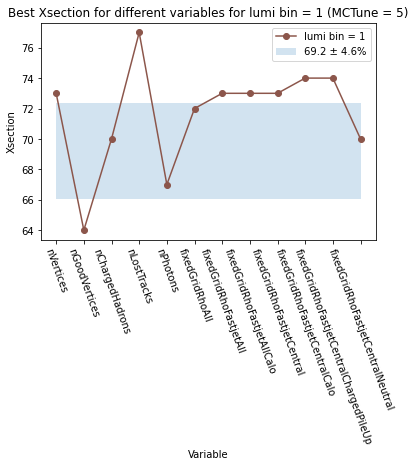

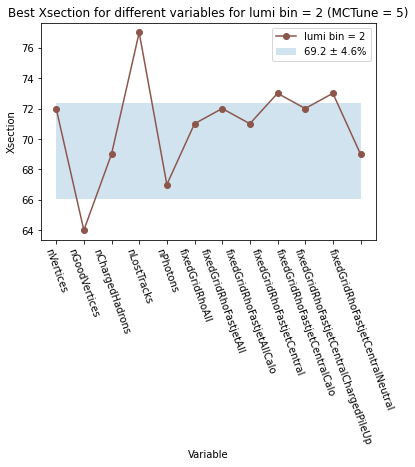

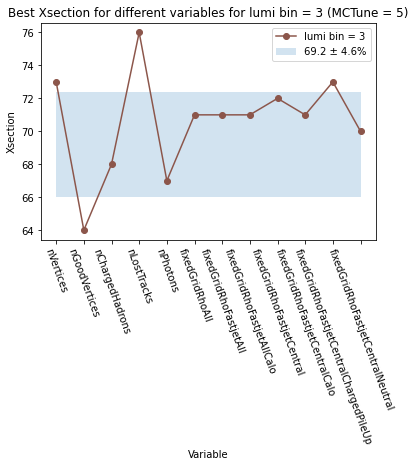

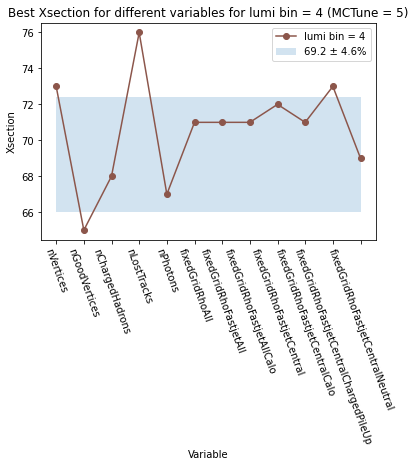

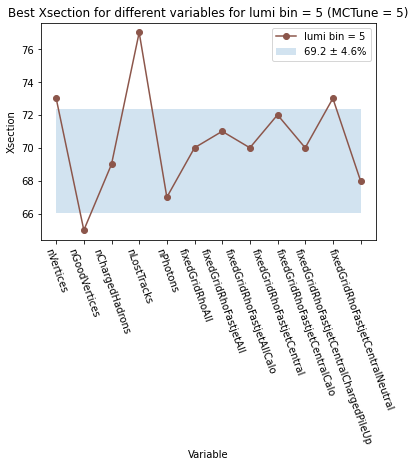

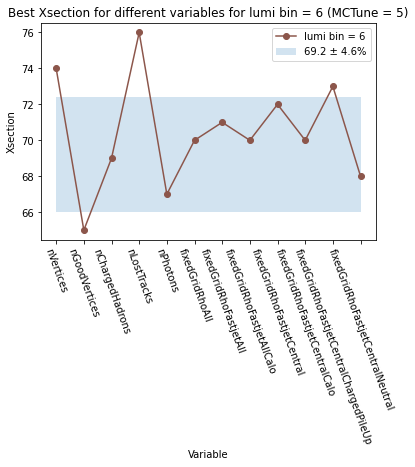

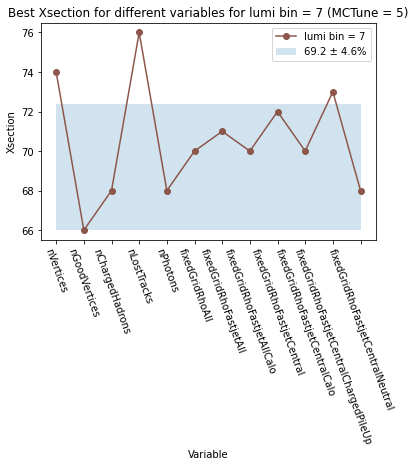

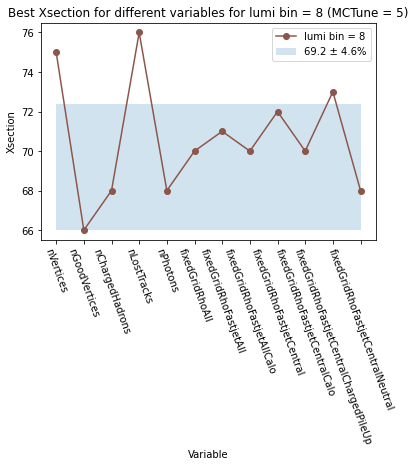

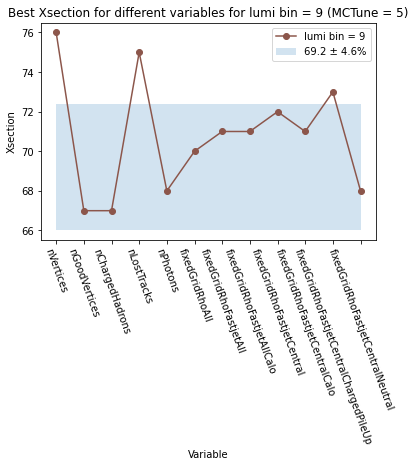

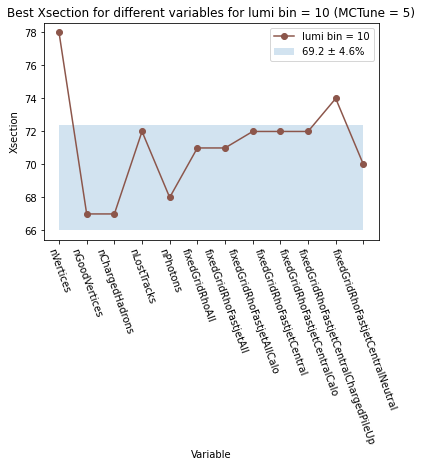

In [27]:
#plot for each lumi bin

import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


XsecBestTot = {}
keys = []
values = []
nVar = len(variables.keys())
print(nVar)

for i in range(vvv[key].nLumiBins):
    for key in vvv:
#         keys.append('{0} for lumi bin = {1} '.format(vvv[key].vname , i+1))
        keys.append(vvv[key].vname)
        values.append(vvv[key].fitResults[i].bestFit)
#     print('values for bin = {0} is: {1}'.format(i+1 , values))
#     print('------------------------------------')
#     print('variables for bin = {0} is: {1}'.format(i+1 , keys))
#     print('------------------------------------')
    XsecBest= {}
    for q in range(len(keys)):
        XsecBest[keys[q]] = values[q]
    
#     print('Dict for bin = {0} is: {1}'.format(i+1 , XsecBest))
#     print('------------------------------------')




    names = list(XsecBest.keys())
    values = list(XsecBest.values())


    #         print('best fit for var = {0} in lumi bin = {1} is : {2} '.format(vvv[key].vname , i+1 , vvv[key].fitResults[i].bestFit))

    plt.plot(names , values ,'o-' , color='tab:brown' , label='lumi bin = {0}'.format(i+1))
    plt.xticks(rotation=290)

    plt.xlabel("Variable")
    plt.ylabel("Xsection")
    plt.title("Best Xsection for different variables for lumi bin = {0} (MCTune = 5)".format(i+1))

    y_est = 69.2 #cross section
    y_err = 69.2*.046 #cross section error

    plt.plot(y_est, '-')
    plt.fill_between(names, y_est - y_err, y_est + y_err, alpha=0.2 , label = u'69.2 \u00B1 4.6%' )

    plt.legend()
#     plt.savefig('{0}/{1}/plot_for_lumi_{2}.png'.format(parent_dir,directory,i+1) , dpi=300, bbox_inches='tight')
#     plt.savefig('{0}/{1}/plot_for_lumi_{2}.png'.format(parent_dir1,directory1,i+1) , dpi=300, bbox_inches='tight')   # save the figure to file

    plt.show()

    
#     fig.write_html('/plot for lumi =1')

#     plt.savefig('XSection Best fit for lumi = {0}.png'.format(i+1))
    keys = []
    values = []
# print(keys)
# print(values)
#     print(values)
for i in range(len(keys)):
    XsecBestTot[keys[i]] = values[i]

# print(XsecBestTot)


## Fit Quality for all variables:

### pull plot

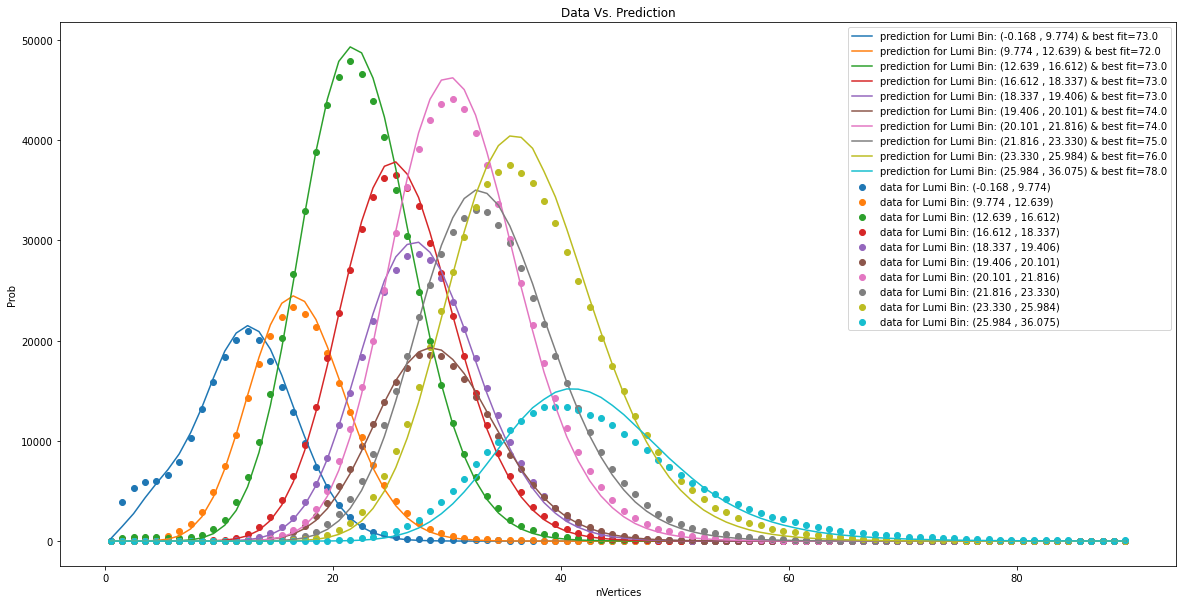

In [28]:
# cross = vvv[variable].fitResults[lumi_bin].bestFit
plt_1 = plt.figure(figsize=(20, 10))
variable = 'nVertices'
bin_Representative = vvv[variable].data_hists[i].binRepresentatives
for i in range(vvv[variable].nLumiBins):
    lh = vvv[variable].lumi_hists[i]
    norm = vvv[variable].data_hists[i].integral()
    data_list=vvv[variable].data_hists[i].allProbs()
    pre_list = vvv[variable].predictions[i].allProbs(param=vvv[variable].fitResults[i].bestFit)
    pre_list_norm = norm *pre_list
    plt.scatter(bin_Representative , data_list , label =  'data for Lumi Bin: ({0:.3f} , {1:.3f})'.format(lh.min*40 , lh.max*40))
    plt.plot(bin_Representative , pre_list_norm , label =  'prediction for Lumi Bin: ({0:.3f} , {1:.3f}) & best fit={2}'.format(lh.min*40 , lh.max*40 , vvv[variable].fitResults[i].bestFit))

    
plt.xlabel(variable)
plt.ylabel('Prob')
plt.legend()
plt.title('Data Vs. Prediction')
ax=plt.axes()

# Set color

ax.set_facecolor('white')
plt.savefig('{0}/{1}/dataVpre_{2}.png'.format(parent_dir,directory,variable) , bbox_inches='tight' , facecolor='white', transparent=False)   # save the figure to file
# 
plt.show()

### Fit quality for one variable:

In [29]:
variable = 'nVertices'
maxtoshow=25
smoothing=1.3
Fit = []
fit = 0
for i in range(vvv[variable].nLumiBins):
    
    theName = "Lumi bin = {0}".format(i+1)
    
    dh = vvv[variable].data_hists[i]
    norm = int(dh.integral())
    x = []
    y = []
    
    for b in dh.binRepresentatives:      
        x.append(b)
        data= float( dh.p(b) )
        pred =norm*float( vvv[variable].predictions[i].p(param=vvv[variable].fitResults[i].bestFit , val=b) )
#         print(pred)
        if pred <=0:
            yval = 0
        else:
            yval = np.absolute(data-pred)/math.sqrt(pred)
        y.append(min(yval , maxtoshow) )
    print(norm)
    print(sum(y))
    fit += (sum(y)/math.sqrt(norm))
Fit.append(fit)
print(Fit)
#     dh.allProbs()
#     plt.plot(x , y , label = theName )
# plt.legend()
# plt.show()

234587
1219.4830617764842
255811
1023.9399910368008
596926
1213.5474304673955
469017
675.6500856695344
383873
588.2999289747254
255915
434.4618810610535
639787
685.577415732916
511828
836.0962023596888
639775
1281.640670205766
277051
1371.4633573085637
[15.141630520500865]


In [30]:
for variable in vvv:
    print(variable)

nVertices
nGoodVertices
nChargedHadrons
nLostTracks
nPhotons
fixedGridRhoAll
fixedGridRhoFastjetAll
fixedGridRhoFastjetAllCalo
fixedGridRhoFastjetCentral
fixedGridRhoFastjetCentralCalo
fixedGridRhoFastjetCentralChargedPileUp
fixedGridRhoFastjetCentralNeutral


['nVertices', 'nGoodVertices', 'nChargedHadrons', 'nLostTracks', 'nPhotons', 'fixedGridRhoAll', 'fixedGridRhoFastjetAll', 'fixedGridRhoFastjetAllCalo', 'fixedGridRhoFastjetCentral', 'fixedGridRhoFastjetCentralCalo', 'fixedGridRhoFastjetCentralChargedPileUp', 'fixedGridRhoFastjetCentralNeutral']
[15.141630520500865, 9.177026315300138, 3.5928586363248924, 1.1858028568179475, 5.050961069862901, 11.189856669567252, 11.53582647854132, 8.047941098032583, 8.843346806707215, 6.30203276367156, 4.825923257603425, 3.4454982620689742]


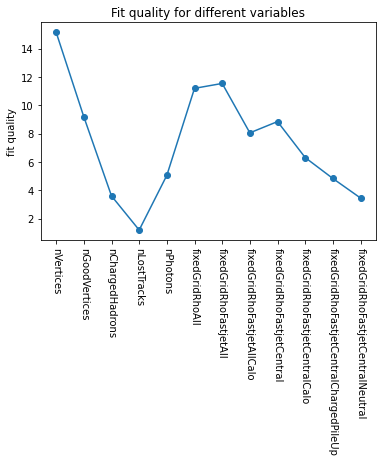

In [31]:
maxtoshow=25
smoothing=1.3
Fit = []
Variables = []
for variable in vvv:
    Variables.append(variable)
    fit = 0
    for i in range(vvv[variable].nLumiBins):

        theName = "Lumi bin = {0}".format(i+1)

        dh = vvv[variable].data_hists[i]
        norm = int(dh.integral())
        x = []
        y = []

        for b in dh.binRepresentatives:      
            x.append(b)
            data= float( dh.p(b) )
            pred =norm*float( vvv[variable].predictions[i].p(param=vvv[variable].fitResults[i].bestFit , val=b) )
    #         print(pred)
            if pred <= 0:
                yval = 0
            else:
                yval = np.absolute(data-pred)/math.sqrt(pred)
            y.append(min(yval , maxtoshow) )
#         print(norm)
#         print(sum(y))
        fit += (sum(y)/math.sqrt(norm))
    Fit.append(fit)
print(Variables)
print(Fit)



plt.plot(Variables , Fit ,'o-' , label='fit quality')
plt.xticks(rotation=270)

# plt.xlabel("Variable")
plt.ylabel("fit quality")
plt.title("Fit quality for different variables")

plt.savefig('{0}/{1}/FitQuality.png'.format(parent_dir,directory) , dpi=300, bbox_inches='tight' , facecolor='white', transparent=False)   # save the figure to file
plt.savefig('{0}/{1}/FitQuality.png'.format(parent_dir1,directory1) , dpi=300, bbox_inches='tight' , facecolor='white', transparent=False)   # save the figure to file

plt.show()

### Fit for each Lumi bin

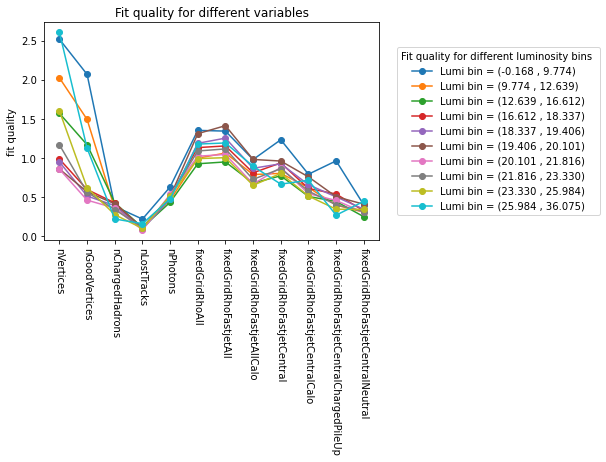

In [32]:
maxtoshow=25
smoothing=1.3

for i in range(vvv[variable].nLumiBins):
    lh = vvv[variable].lumi_hists[i]
    theName = "Lumi bin = ({0:.3f} , {1:.3f})".format(lh.min*40 , lh.max*40)
    Fit = []
    Variables = []
    for variable in vvv:
        Variables.append(variable)
        fit = 0
#     for i in range(vvv[variable].nLumiBins):

        

        dh = vvv[variable].data_hists[i]
        norm = int(dh.integral())
        x = []
        y = []

        for b in dh.binRepresentatives:      
            x.append(b)
            data= float( dh.p(b) )
            pred =norm*float( vvv[variable].predictions[i].p(param=vvv[variable].fitResults[i].bestFit , val=b) )
    #         print(pred)
            if pred <= 0:
                yval = 0
            else:
                yval = np.absolute(data-pred)/math.sqrt(pred)
            y.append(min(yval , maxtoshow) )
#         print(norm)
#         print(sum(y))
        fit += (sum(y)/math.sqrt(norm))
        Fit.append(fit)
    plt.plot(Variables , Fit ,'o-' , label='{0}'.format(theName))
# print(Variables)
# print(Fit)



    
plt.xticks(rotation=270)

# plt.xlabel("Variable")
plt.ylabel("fit quality")
plt.title("Fit quality for different variables")

plt.legend(bbox_to_anchor=(1.04, 0.5),loc='center left' , title = 'Fit quality for different luminosity bins ')
plt.savefig('{0}/{1}/FitQuality_eachLumi.png'.format(parent_dir,directory) , dpi=300, bbox_inches='tight' , facecolor='white', transparent=False)   # save the figure to file
plt.savefig('{0}/{1}/FitQuality_eachLumi.png'.format(parent_dir1,directory1) , dpi=300, bbox_inches='tight' , facecolor='white', transparent=False)   # save the figure to file
plt.show()

In [33]:
# eAll =vvv['nEles'].data_hists[0].integral()
# print('All electrons:' ,eAll)
# print('All nVertices:' ,vvv['nVertices'].data_hists[0].integral())
# print('All nPhotons:' ,vvv['nPhotons'].data_hists[0].integral())
# print('electrons data:' , vvv['nEles'].data_hists[0].allProbs())
# print('electrons prob:' , vvv['nEles'].predictions[0].allProbs()*eAll)
# datalist1 = vvv['nEles'].data_hists[0].allProbs() / vvv['nEles'].data_hists[0].integral()
# print('electrons datalist normal' , datalist1)
# print(sum(datalist1))


# datalist2 = vvv['nPhotons'].data_hists[0].allProbs() / vvv['nPhotons'].data_hists[0].integral()
# print('Photons datalist normal' , datalist2)
# print(sum(datalist2))

# datalist3 = vvv['nChargedHadrons'].data_hists[0].allProbs() / vvv['nChargedHadrons'].data_hists[0].integral()
# print('nChargedHadrons datalist normal' , datalist3)
# print(sum(datalist3))

# x = len(datalist1)
# xx = np.arange(x)
# print(xx)
# vvv['nVertices'].data_hists[0].plot()


###  Integral for all variable in all Bins:


In [34]:
for x in vvv['nVertices'].lumi_hists:
    print('lumi bin = {0:.3f} - {1:.3f}'.format(x.min , x.max))


lumi bin = -0.004 - 0.244
lumi bin = 0.244 - 0.316
lumi bin = 0.316 - 0.415
lumi bin = 0.415 - 0.458
lumi bin = 0.458 - 0.485
lumi bin = 0.485 - 0.503
lumi bin = 0.503 - 0.545
lumi bin = 0.545 - 0.583
lumi bin = 0.583 - 0.650
lumi bin = 0.650 - 0.902


In [35]:
for i in range(vvv['nVertices'].nLumiBins):
    for key in vvv:
        dh = vvv[key].data_hists[i]
        norm = int(dh.integral())
        print('in LumiBin = {0} integral of varible data: {1} is: {2}'.format(i+1 , key , norm))

in LumiBin = 1 integral of varible data: nVertices is: 234587
in LumiBin = 1 integral of varible data: nGoodVertices is: 234587
in LumiBin = 1 integral of varible data: nChargedHadrons is: 2344320
in LumiBin = 1 integral of varible data: nLostTracks is: 234303
in LumiBin = 1 integral of varible data: nPhotons is: 1172935
in LumiBin = 1 integral of varible data: fixedGridRhoAll is: 234584
in LumiBin = 1 integral of varible data: fixedGridRhoFastjetAll is: 234581
in LumiBin = 1 integral of varible data: fixedGridRhoFastjetAllCalo is: 234564
in LumiBin = 1 integral of varible data: fixedGridRhoFastjetCentral is: 234586
in LumiBin = 1 integral of varible data: fixedGridRhoFastjetCentralCalo is: 234570
in LumiBin = 1 integral of varible data: fixedGridRhoFastjetCentralChargedPileUp is: 234587
in LumiBin = 1 integral of varible data: fixedGridRhoFastjetCentralNeutral is: 234587
in LumiBin = 2 integral of varible data: nVertices is: 255811
in LumiBin = 2 integral of varible data: nGoodVertice

## some features of the code:

In [36]:
for key in vvv:
    for i in range(vvv[key].nLumiBins):
        print('best fit for var: {0} in lumi bin = {1} is : {2} '.format(vvv[key].vname , i+1 , vvv[key].fitResults[i].bestFit))

best fit for var: nVertices in lumi bin = 1 is : 73.0 
best fit for var: nVertices in lumi bin = 2 is : 72.0 
best fit for var: nVertices in lumi bin = 3 is : 73.0 
best fit for var: nVertices in lumi bin = 4 is : 73.0 
best fit for var: nVertices in lumi bin = 5 is : 73.0 
best fit for var: nVertices in lumi bin = 6 is : 74.0 
best fit for var: nVertices in lumi bin = 7 is : 74.0 
best fit for var: nVertices in lumi bin = 8 is : 75.0 
best fit for var: nVertices in lumi bin = 9 is : 76.0 
best fit for var: nVertices in lumi bin = 10 is : 78.0 
best fit for var: nGoodVertices in lumi bin = 1 is : 64.0 
best fit for var: nGoodVertices in lumi bin = 2 is : 64.0 
best fit for var: nGoodVertices in lumi bin = 3 is : 64.0 
best fit for var: nGoodVertices in lumi bin = 4 is : 65.0 
best fit for var: nGoodVertices in lumi bin = 5 is : 65.0 
best fit for var: nGoodVertices in lumi bin = 6 is : 65.0 
best fit for var: nGoodVertices in lumi bin = 7 is : 66.0 
best fit for var: nGoodVertices in l

In [37]:
vvv['nVertices'].subRunNumbers


[317080, 317213, 317319, 317382, 317438, 317527, 317648, 317683, 318876]

In [38]:
for i in  vvv['nVertices']._subRuns:
    x = i.run
    print(x)
print(len(vvv['nVertices']._subRuns))

317080
317648
317382
317319
318876
317438
317683
317213
317527
9


In [39]:
x = vvv['nVertices'].subRunNumbers
print(x)

[317080, 317213, 317319, 317382, 317438, 317527, 317648, 317683, 318876]


In [40]:

for key in vvv:
    for i in range(vvv[key].nLumiBins):
        print('best fit for var = {0} in lumi bin = {1} is : {2} '.format(vvv[key].vname , i+1 , vvv[key].fitResults[i].bestFit))

best fit for var = nVertices in lumi bin = 1 is : 73.0 
best fit for var = nVertices in lumi bin = 2 is : 72.0 
best fit for var = nVertices in lumi bin = 3 is : 73.0 
best fit for var = nVertices in lumi bin = 4 is : 73.0 
best fit for var = nVertices in lumi bin = 5 is : 73.0 
best fit for var = nVertices in lumi bin = 6 is : 74.0 
best fit for var = nVertices in lumi bin = 7 is : 74.0 
best fit for var = nVertices in lumi bin = 8 is : 75.0 
best fit for var = nVertices in lumi bin = 9 is : 76.0 
best fit for var = nVertices in lumi bin = 10 is : 78.0 
best fit for var = nGoodVertices in lumi bin = 1 is : 64.0 
best fit for var = nGoodVertices in lumi bin = 2 is : 64.0 
best fit for var = nGoodVertices in lumi bin = 3 is : 64.0 
best fit for var = nGoodVertices in lumi bin = 4 is : 65.0 
best fit for var = nGoodVertices in lumi bin = 5 is : 65.0 
best fit for var = nGoodVertices in lumi bin = 6 is : 65.0 
best fit for var = nGoodVertices in lumi bin = 7 is : 66.0 
best fit for var = 

In [41]:
for key in vvv:
    for i in range(vvv[key].nLumiBins):
        if i == 3 - 1:
            print('best fit for var = {0} in lumi bin = {1} is : {2} '.format(vvv[key].vname , i+1 , vvv[key].fitResults[i].bestFit))

best fit for var = nVertices in lumi bin = 3 is : 73.0 
best fit for var = nGoodVertices in lumi bin = 3 is : 64.0 
best fit for var = nChargedHadrons in lumi bin = 3 is : 68.0 
best fit for var = nLostTracks in lumi bin = 3 is : 76.0 
best fit for var = nPhotons in lumi bin = 3 is : 67.0 
best fit for var = fixedGridRhoAll in lumi bin = 3 is : 71.0 
best fit for var = fixedGridRhoFastjetAll in lumi bin = 3 is : 71.0 
best fit for var = fixedGridRhoFastjetAllCalo in lumi bin = 3 is : 71.0 
best fit for var = fixedGridRhoFastjetCentral in lumi bin = 3 is : 72.0 
best fit for var = fixedGridRhoFastjetCentralCalo in lumi bin = 3 is : 71.0 
best fit for var = fixedGridRhoFastjetCentralChargedPileUp in lumi bin = 3 is : 73.0 
best fit for var = fixedGridRhoFastjetCentralNeutral in lumi bin = 3 is : 70.0 


In [42]:
import numpy as np
import matplotlib.pyplot as plt


XsecBest = {}
keys = []
values = []
nVar = len(variables.keys())
print(nVar)

for i in range(vvv[key].nLumiBins):
    for key in vvv:
        keys.append(vvv[key].vname)
        values.append(vvv[key].fitResults[i].bestFit)

        
        
        
print(keys)
print(values)

12
['nVertices', 'nGoodVertices', 'nChargedHadrons', 'nLostTracks', 'nPhotons', 'fixedGridRhoAll', 'fixedGridRhoFastjetAll', 'fixedGridRhoFastjetAllCalo', 'fixedGridRhoFastjetCentral', 'fixedGridRhoFastjetCentralCalo', 'fixedGridRhoFastjetCentralChargedPileUp', 'fixedGridRhoFastjetCentralNeutral', 'nVertices', 'nGoodVertices', 'nChargedHadrons', 'nLostTracks', 'nPhotons', 'fixedGridRhoAll', 'fixedGridRhoFastjetAll', 'fixedGridRhoFastjetAllCalo', 'fixedGridRhoFastjetCentral', 'fixedGridRhoFastjetCentralCalo', 'fixedGridRhoFastjetCentralChargedPileUp', 'fixedGridRhoFastjetCentralNeutral', 'nVertices', 'nGoodVertices', 'nChargedHadrons', 'nLostTracks', 'nPhotons', 'fixedGridRhoAll', 'fixedGridRhoFastjetAll', 'fixedGridRhoFastjetAllCalo', 'fixedGridRhoFastjetCentral', 'fixedGridRhoFastjetCentralCalo', 'fixedGridRhoFastjetCentralChargedPileUp', 'fixedGridRhoFastjetCentralNeutral', 'nVertices', 'nGoodVertices', 'nChargedHadrons', 'nLostTracks', 'nPhotons', 'fixedGridRhoAll', 'fixedGridRhoFas

In [43]:
for i in range (vvv['nVertices'].nLumiBins):
    print(vvv['nVertices'].data_hists[i].integral())

234587.0
255811.0
596926.0
469017.0
383873.0
255915.0
639787.0
511828.0
639775.0
277051.0


In [44]:
vvv['nVertices'].data_hists[0].integral()

234587.0

In [45]:
vvv['nVertices'].predictions

In [46]:
vvv['nVertices'].plotPredictions([45])

In [47]:
vvv['nVertices'].predictions[0].plot()

In [48]:
 vvv['nVertices'].predictions[0].plot(param=vvv['nVertices'].fitResults[0].bestFit ,
                                    norm=vvv['nVertices'].data_hists[0].integral()
                                    )

In [49]:
vvv['nVertices'].predictions[0].plot(norm=vvv['nVertices'].data_hists[0].integral() ,param=vvv['nVertices'].fitResults[0].bestFit)


In [50]:

prelist = vvv['nVertices'].predictions[0].allProbs()
print(prelist)
print(sum(prelist))

[1.47526609e-02 6.67351595e-02 9.60477146e-02 1.29257310e-01
 1.49751130e-01 1.49716951e-01 1.30656349e-01 1.00652622e-01
 6.94672400e-02 4.35670216e-02 2.48459195e-02 1.30998706e-02
 6.40589477e-03 2.95186620e-03 1.26300061e-03 5.20535880e-04
 1.97932117e-04 7.24838435e-05 2.58094882e-05 8.61496681e-06
 2.69154455e-06 8.52294322e-07 2.62375142e-07 7.88985578e-08
 1.98067491e-08 6.17673865e-09 1.42855940e-09 7.46556966e-10
 8.33384385e-11 1.89324443e-11 7.35718857e-12 1.51022427e-12
 3.34486855e-13 1.19376797e-13 1.12881276e-14 1.09424262e-14
 6.38544482e-16 1.06012128e-16 2.00192051e-17 5.00700951e-16
 3.07037102e-18 2.13608494e-19 9.44129136e-20 6.43270042e-20
 1.24386967e-20 2.22236114e-20 2.34554361e-21 2.41574255e-23
 3.69983275e-23 2.88153309e-23 7.76744589e-23 2.07437356e-24
 4.08059656e-25 9.46545739e-26 6.96075890e-26 1.06394136e-26
 1.82759635e-26 5.40443118e-26 5.40748690e-28 4.77550978e-29
 4.00855370e-29 2.43466375e-28 6.40673645e-30 4.02280365e-31
 1.30059693e-31 1.486212

In [51]:
vvv['nVertices'].data_hists[0].plot()


In [52]:
datalist =(vvv['nVertices'].data_hists[0].allProbs())/(vvv['nVertices'].data_hists[0].integral())
print(datalist)
print(sum(datalist))

[0.00000000e+00 1.66377506e-02 2.27420957e-02 2.51591094e-02
 2.57345889e-02 2.80194555e-02 3.38211410e-02 4.37023364e-02
 5.61667953e-02 6.77616407e-02 7.84868727e-02 8.56015039e-02
 8.95446039e-02 8.57038114e-02 7.66154987e-02 6.56813890e-02
 5.49348429e-02 4.18991675e-02 3.13913388e-02 2.30063900e-02
 1.54825289e-02 1.02009063e-02 6.62014519e-03 4.04540746e-03
 2.82198076e-03 1.54740032e-03 9.67658054e-04 7.97145622e-04
 5.41376973e-04 3.41024865e-04 3.66601730e-04 3.32499243e-04
 3.45287676e-04 2.77082703e-04 2.60031460e-04 2.47243027e-04
 2.25928973e-04 2.21666162e-04 2.47243027e-04 1.57724000e-04
 2.34454595e-04 1.23621514e-04 1.10833081e-04 1.40672757e-04
 8.95190271e-05 1.36409946e-04 5.54165406e-05 4.68909189e-05
 6.39421622e-05 5.96793514e-05 5.11537297e-05 5.54165406e-05
 4.68909189e-05 1.27884324e-05 4.26281081e-06 8.52562162e-06
 8.52562162e-06 8.52562162e-06 1.27884324e-05 1.70512432e-05
 1.27884324e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.52562162e-06 4.262810

In [53]:
n = 0
for i in range(len(datalist)):
#     print(datalist[i])
#     print(prelist[i])
# #     print('-------')
    if datalist[i] == 0 :
        pass
    else: 
        m = datalist[i] - prelist[i]
        k = m**2
        j = k/datalist[i]
#         print(j)
        n += j
#         print(n)
        m = 0
#         print('-----------')
print(n/len(datalist))

0.03221380884555179


In [54]:
import math 
n = 0
for i in range(len(datalist)):
#     print(datalist[i])
#     print(prelist[i])
# #     print('-------')
    if datalist[i] == 0 :
        pass
    else: 
        m = prelist[i] - datalist[i]
#         j = m/math.sqrt(datalist[i])
        j = m/math.sqrt(datalist[i])
        n += j
        m = 0
print(n)

0.6083567014051542


In [55]:
 vvv['nVertices']._subRunsSameLumiBins[0].fitResults

[data: nVertices_run317080_lumi1 best fit: 82.0 +- 6.647599138612651,
 data: nVertices_run317080_lumi2 best fit: 72.0 +- 1.0,
 data: nVertices_run317080_lumi3 best fit: 72.0 +- 1.0,
 data: nVertices_run317080_lumi4 best fit: 75.0 +- 1.0,
 data: nVertices_run317080_lumi5 best fit: 74.0 +- 5.870566982150313,
 data: nVertices_run317080_lumi6 best fit: 72.0 +- 1.0,
 data: nVertices_run317080_lumi7 best fit: 74.0 +- 1.0,
 data: nVertices_run317080_lumi8 best fit: 77.0 +- 1.0,
 data: nVertices_run317080_lumi9 best fit: 78.0 +- 1.0,
 data: nVertices_run317080_lumi10 best fit: 78.0 +- 1.0]

In [56]:
vvv['nVertices'].fitResults[0].plot()

In [57]:
vvv['nVertices'].predictions[0].plot()

In [58]:
vvv['nVertices'].data_hists[0].plot()

In [59]:
print(vvv['nVertices'].nLumiBins)

10


In [60]:
vvv['nVertices'].fitResults

[data: nVertices_run0_lumi1 best fit: 73.0 +- 1.0,
 data: nVertices_run0_lumi2 best fit: 72.0 +- 1.0,
 data: nVertices_run0_lumi3 best fit: 73.0 +- 1.0,
 data: nVertices_run0_lumi4 best fit: 73.0 +- 1.0,
 data: nVertices_run0_lumi5 best fit: 73.0 +- 1.0,
 data: nVertices_run0_lumi6 best fit: 74.0 +- 1.0,
 data: nVertices_run0_lumi7 best fit: 74.0 +- 1.0,
 data: nVertices_run0_lumi8 best fit: 75.0 +- 1.0,
 data: nVertices_run0_lumi9 best fit: 76.0 +- 1.0,
 data: nVertices_run0_lumi10 best fit: 78.0 +- 1.0]

In [61]:
simDist = SimulationVSPu('nPhotons' , year = 2018 , var_bins= np.linspace(0,100,101) , pu_max=100 , nthreads=30)

  0%|          | 0/102 [00:00<?, ?it/s, SIMULATION]

In [62]:
aa = simDist.plotEfficiencies()
aa.plot()

In [63]:
for key in variables.keys():
    print('vName: {0}'.format(key))

vName: nVertices
vName: nGoodVertices
vName: nChargedHadrons
vName: nLostTracks
vName: nPhotons
vName: fixedGridRhoAll
vName: fixedGridRhoFastjetAll
vName: fixedGridRhoFastjetAllCalo
vName: fixedGridRhoFastjetCentral
vName: fixedGridRhoFastjetCentralCalo
vName: fixedGridRhoFastjetCentralChargedPileUp
vName: fixedGridRhoFastjetCentralNeutral


In [64]:
MC = SimulationVSPu.mctune
print(MC)

In [65]:
# گرفتن انتگرال pu dist

bina = binning(1 , 2 , 1.5 )
binb = binning(2 , 3 , 2.5)
binc = binning(3, 4 , 3.5)
lumidist = lumiDistNumpy('testlumi' , {bina: 0.33 , binb: 0.33 , binc: 0.33 #lumi bin prob
                                      }, 50 , np.array([1,2,2.5] # pu max and cross section for each bin 
                                                      ))
g = lumidist.PUDist.plot(param = 1)

lumidist.PUDist.plot(param = 2 , g=g )
lumidist.PUDist.plot(param = 3 , g=g )


g.update_layout(
        title="PU dist ",
        xaxis_title= 'PU',
        yaxis_title="probability",
        legend_title="PU number",
    )
g

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,

In [66]:
bina.representative

1.5

In [67]:
counter = 0
for b,v in lumidist.PUDist.vals:
    counter +=1
    print(b,v)
print(counter)

(-0.5,0.5:0.0) [0.11068614 0.01895418 0.0084502 ]
(0.5,1.5:1.0) [0.21304753 0.06251326 0.03354233]
(1.5,2.5:2.0) [0.22852369 0.10910039 0.06901271]
(2.5,3.5:3.0) [0.18316954 0.13745984 0.09997089]
(3.5,4.5:4.0) [0.12192863 0.14345922 0.117222  ]
(4.5,5.5:5.0) [0.07031953 0.13332094 0.12093975]
(5.5,6.5:6.0) [0.03579248 0.11405955 0.11530822]
(6.5,7.5:7.0) [0.01625125 0.09076705 0.1038894 ]
(7.5,8.5:8.0) [0.00663747 0.0672398  0.08887788]
(8.5,9.5:9.0) [0.00245693 0.04632235 0.07200863]
(9.5,10.5:10.0) [0.00082989 0.02967565 0.05505275]
(10.5,11.5:11.0) [0.00025737 0.01769932 0.0396286 ]
(11.5,12.5:12.0) [7.36918643e-05 9.84697811e-03 2.68388085e-02]
(12.5,13.5:13.0) [1.95777638e-05 5.12225650e-03 1.71077476e-02]
(13.5,14.5:14.0) [4.84781128e-06 2.49765719e-03 1.02737895e-02]
(14.5,15.5:15.0) [1.12340627e-06 1.14457658e-03 5.82079829e-03]
(15.5,16.5:16.0) [2.44536287e-07 4.94220810e-04 3.11646988e-03]
(16.5,17.5:17.0) [5.01681176e-08 2.01586976e-04 1.57962544e-03]
(17.5,18.5:18.0) [9.73

In [68]:
# how quantile works:
vals = np.array([1,2,3,4,5,6,7,8,9,10])
quantile = np.array([0 , 0.6 , 1])
lim = np.quantile(vals,quantile)
lim

array([ 1. ,  6.4, 10. ])